## Scikit-Learn을 사용한 머신러닝

## 01장. 분류의 기초
### 5. 다중 클래스 분류

    타겟 클래스가 2개 이상인 경우를 다중 클래스 분류라고 한다.
    다중 클래스 분류는 이진 클래스 분류 문제로 변환해서 해결한다.
    
    - OvO : 각 데이터 별로 클래스 2개씩 대결
    - OvR : 각 데이터 별로 해당 클래스 인지 아닌지 검사, 클래스 개수만큼

### OvO (one vs one)

`OneVsOneClassifier`
- $\frac{k(k-1)}{2}$번 계산

### OvR (one vs rest)

`OneVsRestClassifier`
- $k$번 계산

- - -

In [5]:
import matplotlib.pylab as plt
import pandas as pd
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

In [47]:
iris =  load_iris()
# model1, iris 데이터를 이용해서 로지스틱 선형회귀를 통해 y 클래스값 예측
model1 = LogisticRegression().fit(iris.data, iris.target)

# model2, OvO 하나하나씩 예측
model2 = OneVsOneClassifier(LogisticRegression()).fit(iris.data, iris.target)

# model 3, 
model3 = OneVsRestClassifier(LogisticRegression()).fit(iris.data, iris.target)

In [12]:
import matplotlib as mpl
import matplotlib.font_manager as fm
font_location = "/Library/Fonts/AppleGothic.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
print(font_name)
mpl.rc('font', family=font_name)

AppleGothic


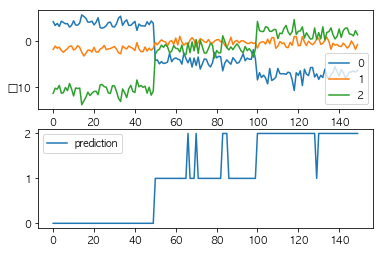

In [53]:
# model 1, 조건부 확률 모형인 로지스틱 선형회귀는 종속변수 target 의 클래스가 3개 이상이여도 바로 적용가능하다.

# 종속 변수의 분별 함수 값 
ax1 = plt.subplot(211)
pd.DataFrame(model1.decision_function(iris.data)).plot(ax=ax1)


# 종속 변수 클래스 예측 값
ax2 = plt.subplot(212)
pd.DataFrame(model1.predict(iris.data), columns=["prediction"]).plot(ax=ax2)
plt.show()

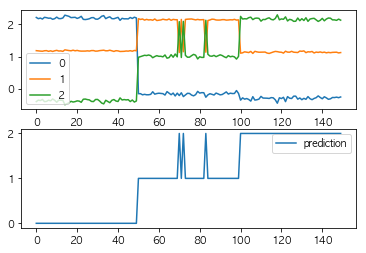

In [46]:
# model 2, OvO 각 데이터 별로

# 종속 변수의 분별 함수 값 
ax1 = plt.subplot(211)
pd.DataFrame(model2.decision_function(iris.data)).plot(ax=ax1)

# 종속 변수 클래스 예측 값
ax2 = plt.subplot(212)
pd.DataFrame(model2.predict(iris.data), columns=["prediction"]).plot(ax=ax2)
plt.show()

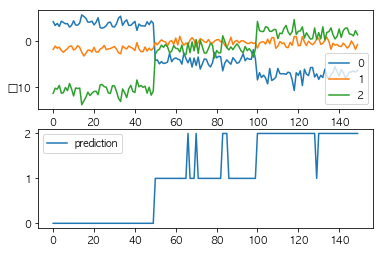

In [54]:
# model 3, OvR

# 종속 변수의 분별 함수 값 
ax1 = plt.subplot(211)
pd.DataFrame(model3.decision_function(iris.data)).plot(ax=ax1)

# 종속 변수 클래스 예측 값
ax2 = plt.subplot(212)
pd.DataFrame(model3.predict(iris.data), columns=["prediction"]).plot(ax=ax2)
plt.show()

# 211 그래프에 중간 부분 모두 음수인데, 그 경우에는 그나마 높은 것을 고른다.
# OvR 에서 양수이면 분별하고자 하는 수 가 맞고(one 채택), 음수이면 그 수가 아니다.(Rest 채택)

    Label Binarizer는 y 즉 종속변수의 클래스를 one-hot-encoding 하기 위한 명령이다. 이렇게 하면 각 열은 OvR 문제를 풀기위한 y 값이 된다.